# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***EDA***

In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Minahan, Miss. Daisy E",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


1. name is unique for the dataset
2. most frequent occuring Ticket is CA. 2343
3. most frequent occuring cabin is B96 B98
4. most frequent occuring Embarked is S

## **checking null value**

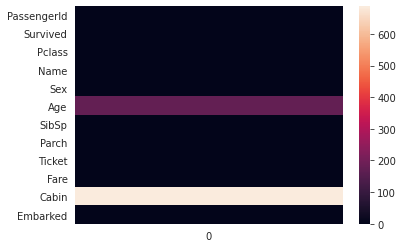

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


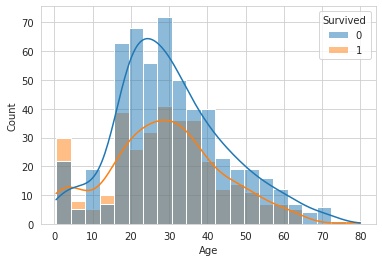

In [ ]:
sns.histplot(x='Age',data=df,kde=True,hue='Survived')

**Selecting random value from Age to replace null value**

In [5]:
def rand_emputer(df,feature):
  ind=df.loc[df[feature].isnull()==True].index
  feat=df[feature].loc[df[feature].isnull()==False]
  val=feat.sample(len(ind))
  val.index=ind
  df[feature].loc[df[feature].isnull()]=val

In [6]:
rand_emputer(df,'Age')

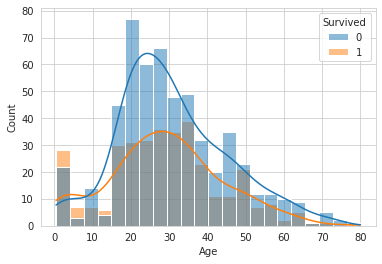

In [7]:
sns.histplot(x='Age',data=df,kde=True,hue='Survived')

**Using a diffrent value to replace null**

In [8]:
df['Cabin']=df['Cabin'].fillna('M')

In [9]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

## **Data Formatting**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All feature is of categorical format

## **Visualization**

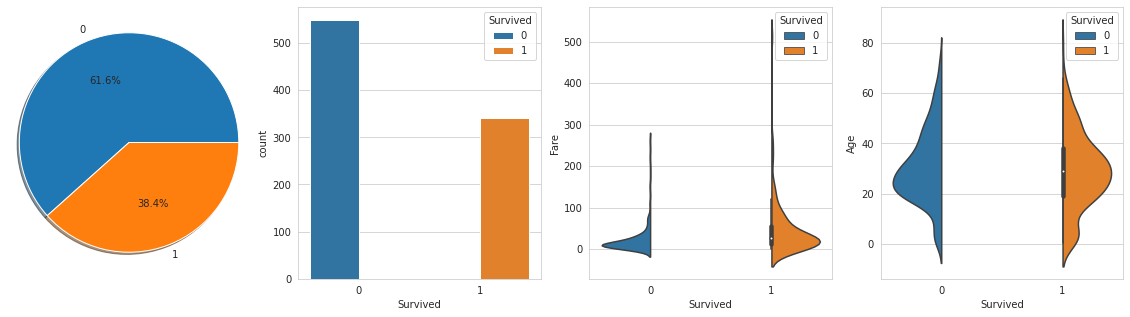

0    1.0
1    NaN
Name: Survived, dtype: float64


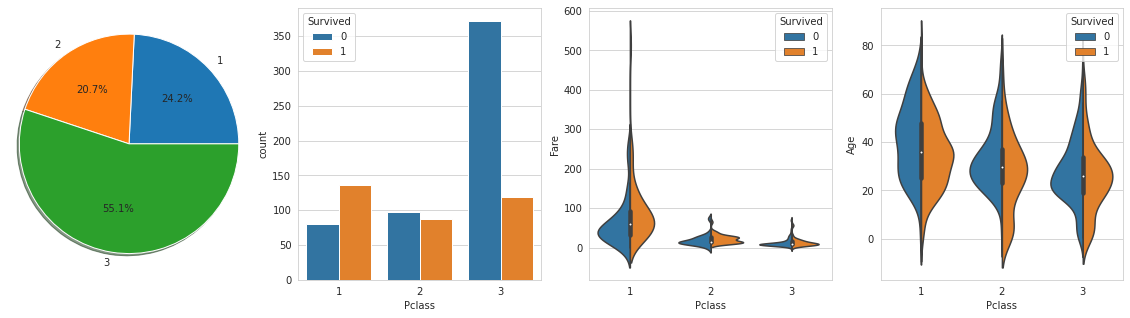

1    0.370370
2    0.527174
3    0.757637
Name: Pclass, dtype: float64


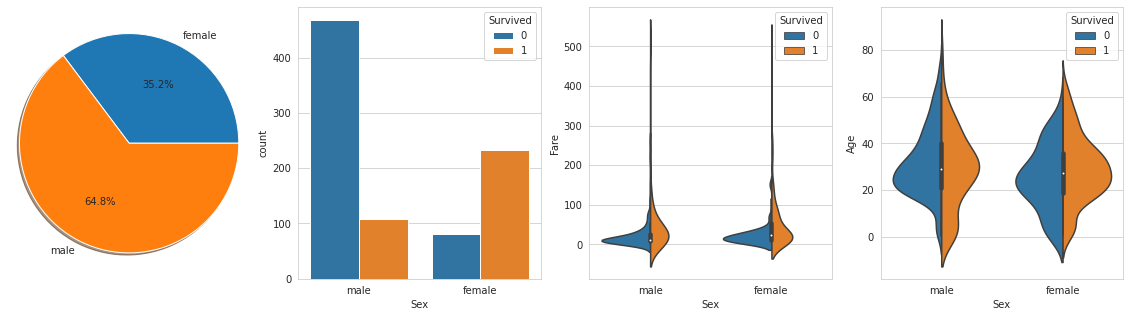

male      0.811092
female    0.257962
Name: Sex, dtype: float64


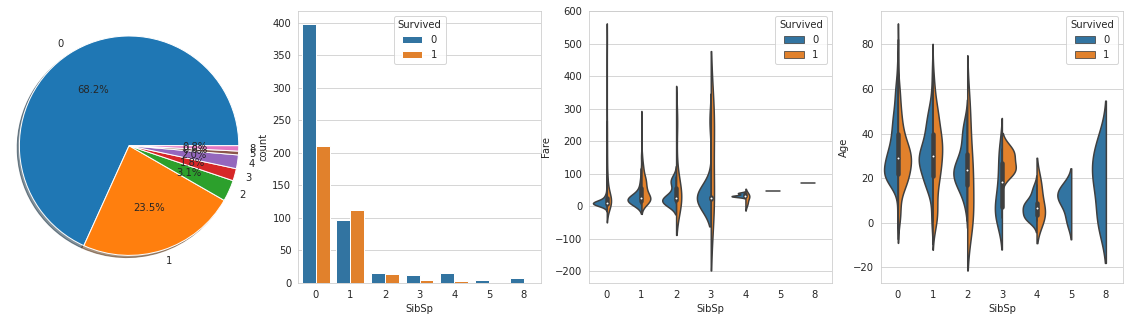

0    0.654605
1    0.464115
2    0.535714
3    0.750000
4    0.833333
5    1.000000
8    1.000000
Name: SibSp, dtype: float64


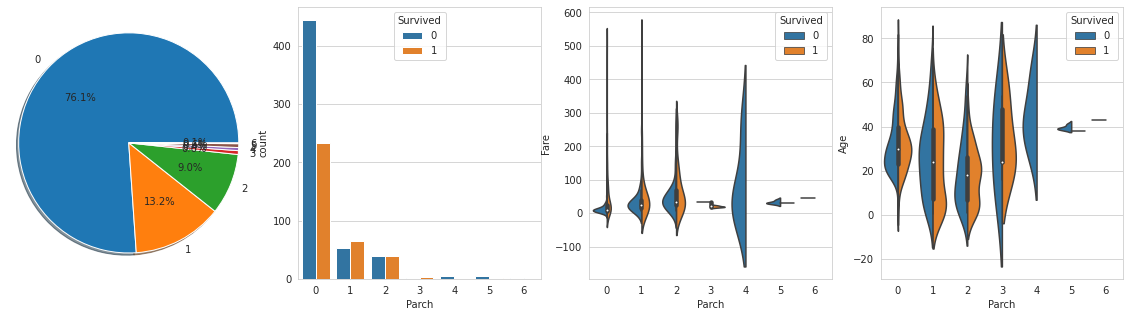

0    0.656342
1    0.449153
2    0.500000
3    0.400000
4    1.000000
5    0.800000
6    1.000000
Name: Parch, dtype: float64


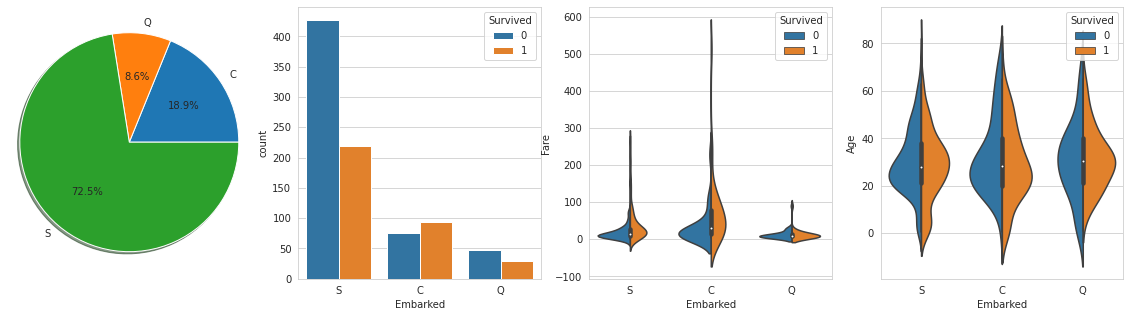

S    0.660991
C    0.446429
Q    0.610390
Name: Embarked, dtype: float64


In [11]:

for i in ['Survived','Pclass','Sex','SibSp','Parch','Embarked']:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2,hue='Survived')
  sns.violinplot(x=i,y='Fare',data=df,hue='Survived',split=True,ax=ax3)
  sns.violinplot(x=i,y='Age',data=df,hue='Survived',split=True,ax=ax4)
  plt.show()
  print(df[i].loc[df['Survived']==0].value_counts()/df[i].value_counts())

1. Class data set is balanced. 
2. Chance of survival for for an infant is higher
3. Person given higher pair are more likely to survive
4. Most of the Infant belongs to Pclass 3 and  Pclass 2
5. P class 1 people are more likely to survive
6. Female are more likely to survive than male on the contrary male child is more likely to survive than a female child
7. Siblings doesn't seems to have any particular relationship with survival
8. Children with one two and three parents are more likely to survive than others.
9. Passengers boarded from port C are more likely to survive than others.
10. Children bordered from C&S are more likely to survive.



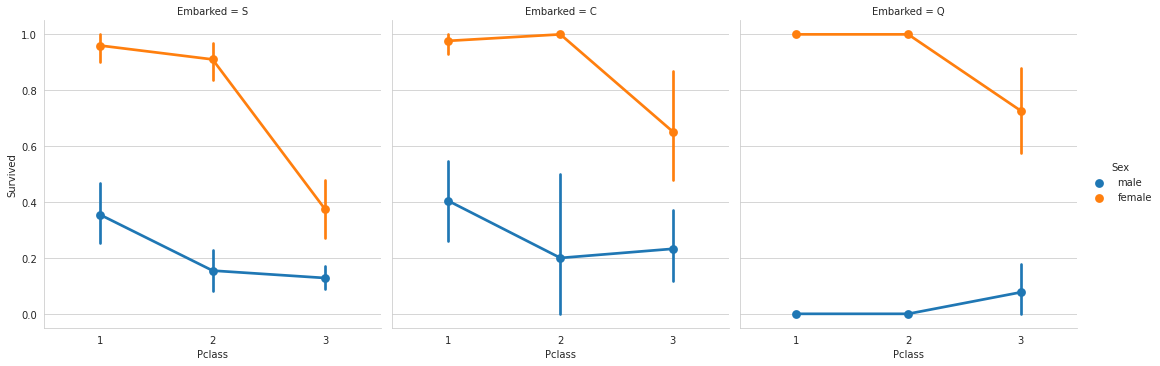

In [12]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df)



1. Almost all females from Pclass 1 and 2 survived.
2. Females dying were mostly from 3rd Pclass. 
3. Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3 for Embarked S and C




Data filtering:-

In [13]:
k=[]
for i in df['Age']:
  if i<=5:
    k.append('Small')
  elif i>5 and i<70:
    k.append('med')
  else:
    k.append('old')

In [14]:
df['Age_class']=k

In [15]:
df.drop('PassengerId',axis=1,inplace=True)

In [16]:
first_name=[]
last_name=[]
for i in df['Name']:
  sep = ' '
  first_name.append(i.split(sep, 1)[0])
  k=(i.split('(', 1)[0].split('.',-1)[1].split(' ',-1)[1])
  if k=='':
    last_name.append('UN')
  else:
    last_name.append(k)
  
  

In [17]:
df['First_name']=first_name
df['Last_name']=last_name

In [18]:
for i in df['Last_name'].unique():
  if df['Last_name'].loc[df['Last_name']==i].count()<3:
    df['Last_name']=df['Last_name'].replace(i,'NN')

for i in df['First_name'].unique():
  if df['First_name'].loc[df['First_name']==i].count()<2:
    df['First_name']=df['First_name'].replace(i,'NN')


In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_class,First_name,Last_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,med,"Braund,",NN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,med,NN,John
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,med,NN,NN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,med,"Futrelle,",NN
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,med,"Allen,",William


**Ticket contain alpha numeric set of characters where alphabets represents special class of ticket**

In [20]:
df['Ticket']=[i[0] for i in list(df['Ticket'])]


In [21]:
k=[]
for i in df['Ticket']:
  if i.isdigit()==True:
    k.append('D')
  else:
    k.append(i)

In [22]:
df['Ticket']=k

**Cabin contain alpha numeric set of characters where alphabets represents class of cabin**

In [23]:
df['Cabin']=[i[0] for i in list(df['Cabin'])]

In [24]:
df.Cabin.value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

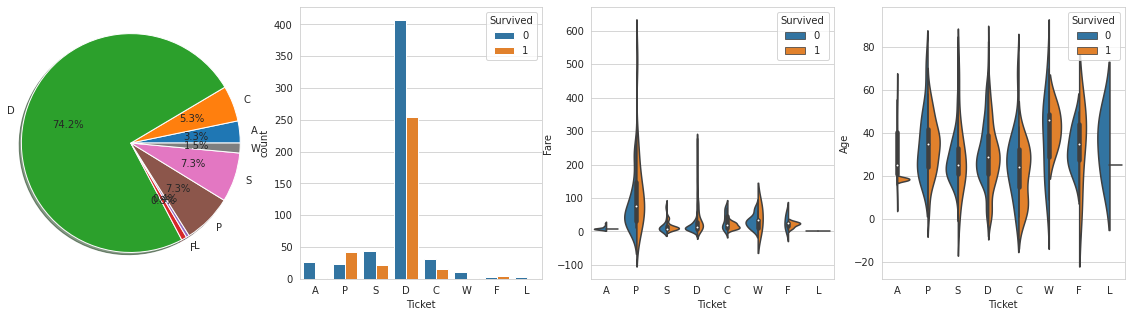

A    0.931034
C    0.659574
D    0.615734
F    0.428571
L    0.750000
P    0.353846
S    0.676923
W    0.846154
Name: Ticket, dtype: float64


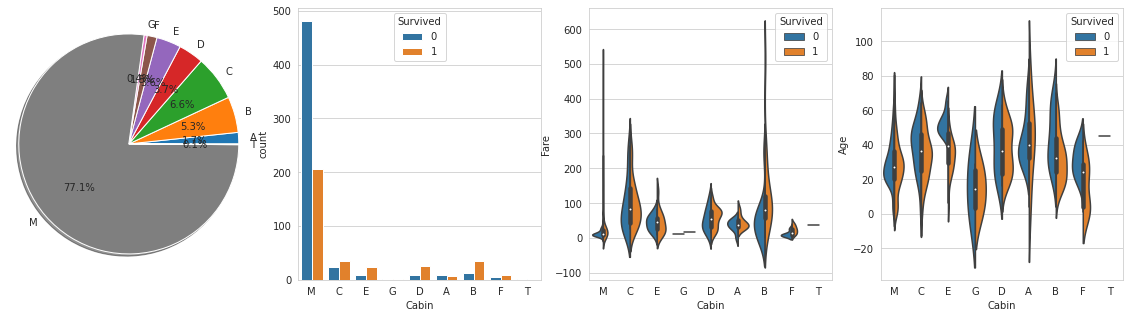

M    0.700146
C    0.406780
B    0.255319
D    0.242424
E    0.250000
A    0.533333
F    0.384615
G    0.500000
T    1.000000
Name: Cabin, dtype: float64


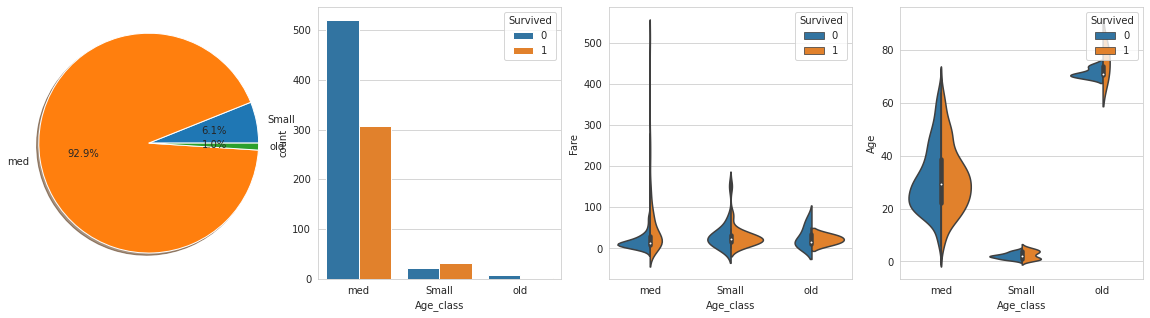

med      0.628019
Small    0.407407
old      0.777778
Name: Age_class, dtype: float64


In [25]:
for i in ['Ticket','Cabin','Age_class']:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2,hue='Survived')
  sns.violinplot(x=i,y='Fare',data=df,hue='Survived',split=True,ax=ax3)
  sns.violinplot(x=i,y='Age',data=df,hue='Survived',split=True,ax=ax4)
  plt.show()
  print(df[i].loc[df['Survived']==0].value_counts()/df[i].value_counts())



1.   Ticket with F and P has high rate of survival
2.   Cabin with A, M and T has low rate of survival
3.   Middle age people paied the highest fare



## **Encoding**:- categories are encoded according to the percentage of value represents edible class (percentage encoding)

In [26]:
df_cat=pd.DataFrame(columns=['Last_name','First_name','Ticket','Cabin','Age_class'])
df_e=df.loc[df['Survived']==1]
df_p=df.loc[df['Survived']==0]
df_encoding=pd.DataFrame(df,copy=True)
for i in df_cat.columns:
  for j in df[i].unique():
    per_e=(df_e[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    per_p=(df_p[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    df_encoding[i].loc[df_encoding[i]==j]=per_p
  
    
#df_cat['diff']=(df_cat['percent_e']-df_cat['percent_p']).abs()




In [27]:
pd.set_option('display.max_rows',None)

In [28]:
df_encoding.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_class,First_name,Last_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,93.1034,7.2500,70.0146,S,62.8019,100,61.0329
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,35.3846,71.2833,40.678,C,62.8019,63.8095,74.1935
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,67.6923,7.9250,70.0146,S,62.8019,63.8095,61.0329
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,61.5734,53.1000,40.678,S,62.8019,50,61.0329
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,61.5734,8.0500,70.0146,S,62.8019,50,66.6667


In [29]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [30]:
df_encoding['Sex']=df['Sex'].map({'male':1,'female':0})
df_encoding['Embarked']=df['Embarked'].map({'C':1,'Q':2,'S':3})
df_encoding.drop('Name',axis=1,inplace=True)

In [31]:
df_encoding.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_class,First_name,Last_name
0,0,3,1,22.0,1,0,93.1034,7.2500,70.0146,3,62.8019,100,61.0329
1,1,1,0,38.0,1,0,35.3846,71.2833,40.678,1,62.8019,63.8095,74.1935
2,1,3,0,26.0,0,0,67.6923,7.9250,70.0146,3,62.8019,63.8095,61.0329
3,1,1,0,35.0,1,0,61.5734,53.1000,40.678,3,62.8019,50,61.0329
4,0,3,1,35.0,0,0,61.5734,8.0500,70.0146,3,62.8019,50,66.6667


## **Changing Data type**

In [32]:
df_encoding=df_encoding.astype(float)

In [33]:
x=df_encoding.drop('Survived',axis=1)
y=df_encoding['Survived']

In [34]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Sex         891 non-null    float64
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    float64
 6   Ticket      891 non-null    float64
 7   Fare        891 non-null    float64
 8   Cabin       891 non-null    float64
 9   Embarked    891 non-null    float64
 10  Age_class   891 non-null    float64
 11  First_name  891 non-null    float64
 12  Last_name   891 non-null    float64
dtypes: float64(13)
memory usage: 90.6 KB


In [35]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in ['Age','Fare']:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=['Age','Fare'])


In [36]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

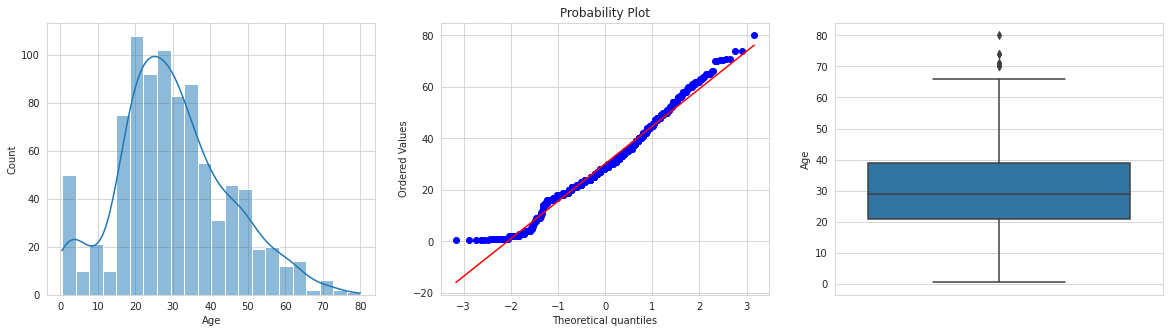

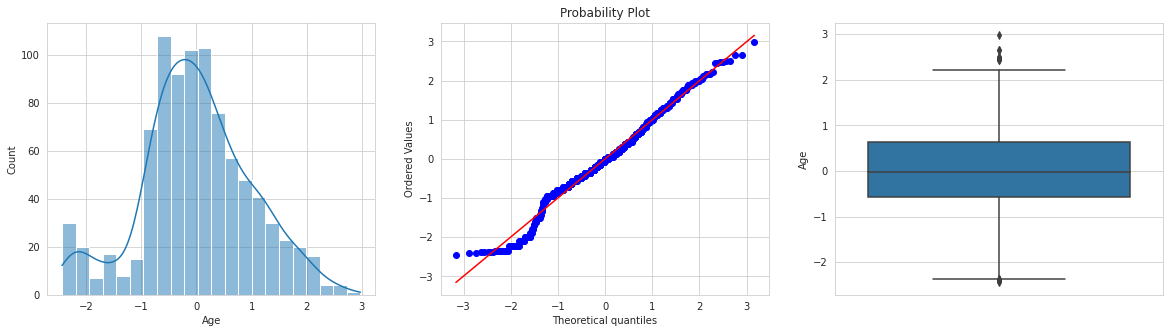

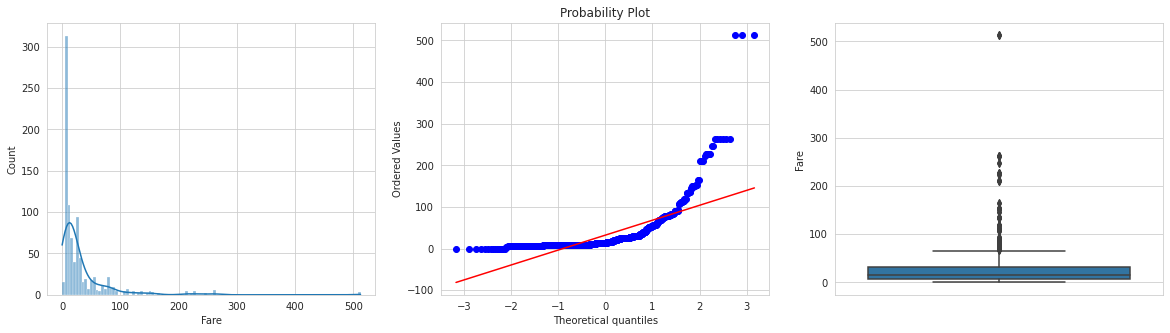

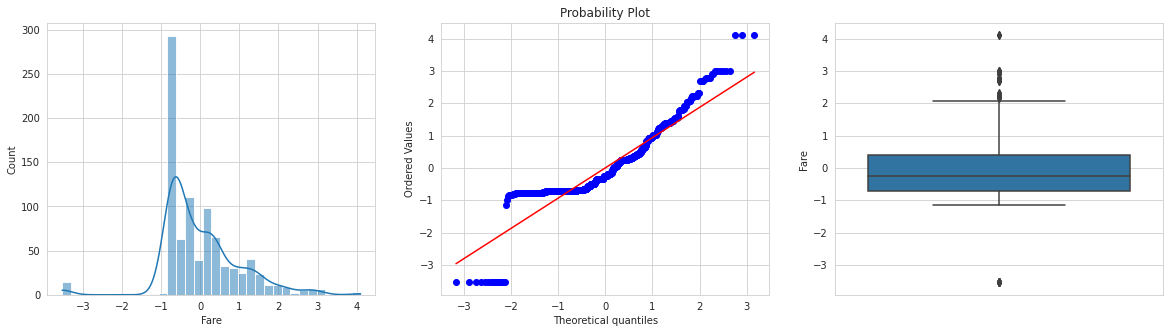

In [37]:
import scipy.stats as stat
import pylab 
pt1=pd.DataFrame(pt1,columns=['Age','Fare'])
#pd.concat([pt1,df.quality],axis=1)
for i in ['Age','Fare']:
  pplot(df,i)
  pplot(pt1,i)

In [40]:
df_encoding=pd.concat([df_encoding.drop(['Age','Fare'],axis=1),pt1],axis=1)

In [41]:
df_encoding.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_class,First_name,Last_name,Age,Fare
0,0.0,3.0,1.0,1.0,0.0,93.103448,70.014556,3.0,62.801932,100.000000,61.032864,-0.497347,-0.760522
1,1.0,1.0,0.0,1.0,0.0,35.384615,40.677966,1.0,62.801932,63.809524,74.193548,0.570251,1.274098
2,1.0,3.0,0.0,0.0,0.0,67.692308,70.014556,3.0,62.801932,63.809524,61.032864,-0.217246,-0.699307
3,1.0,1.0,0.0,1.0,0.0,61.573374,40.677966,3.0,62.801932,50.000000,61.032864,0.379559,0.949656
4,0.0,3.0,1.0,0.0,0.0,61.573374,70.014556,3.0,62.801932,50.000000,66.666667,0.379559,-0.688418


## **Correlation**

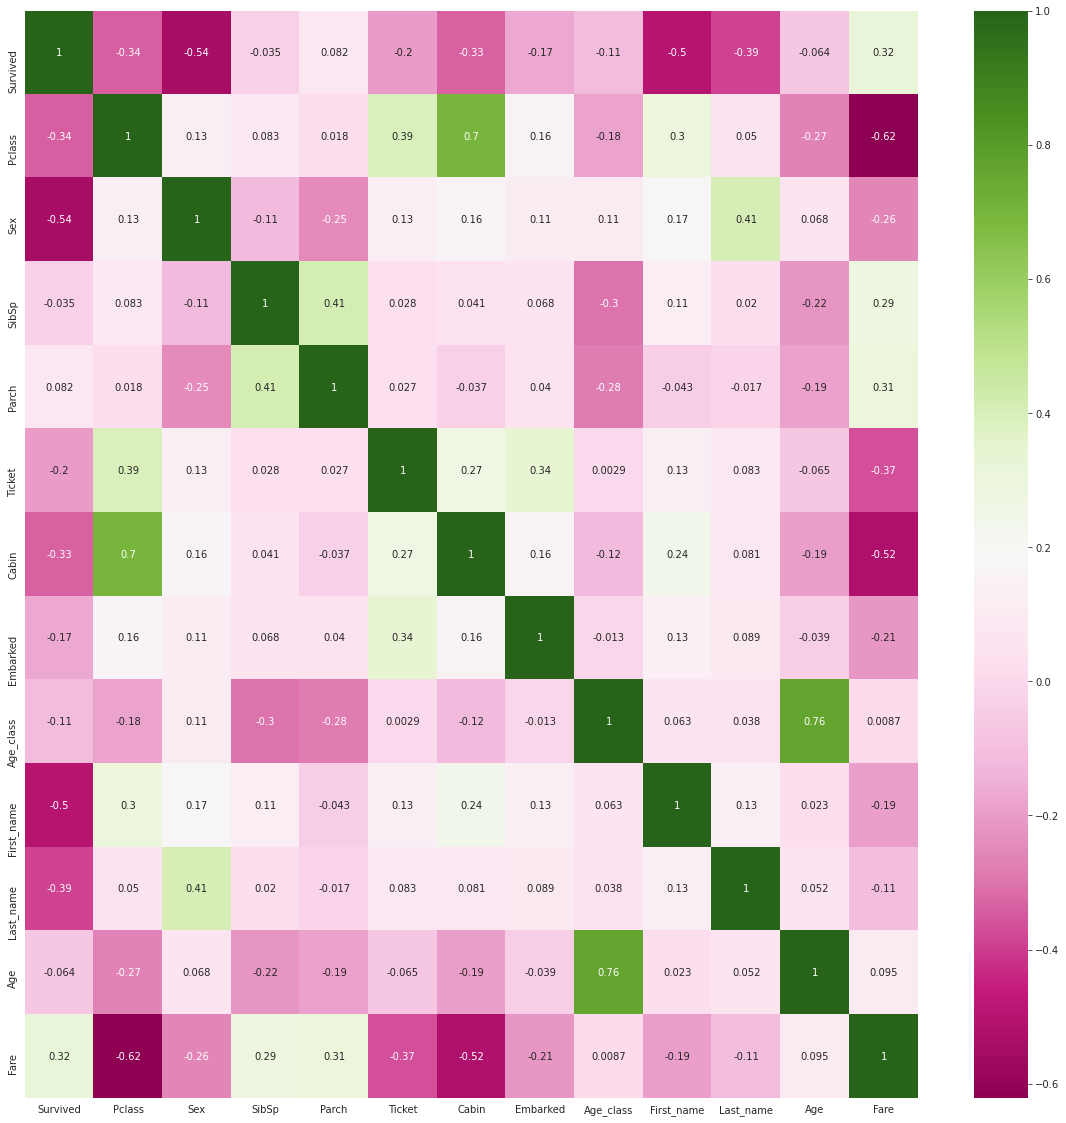

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_encoding.corr(),annot=True,cmap='PiYG')

corilation is not a sutaible method for selecting catagorical variable 

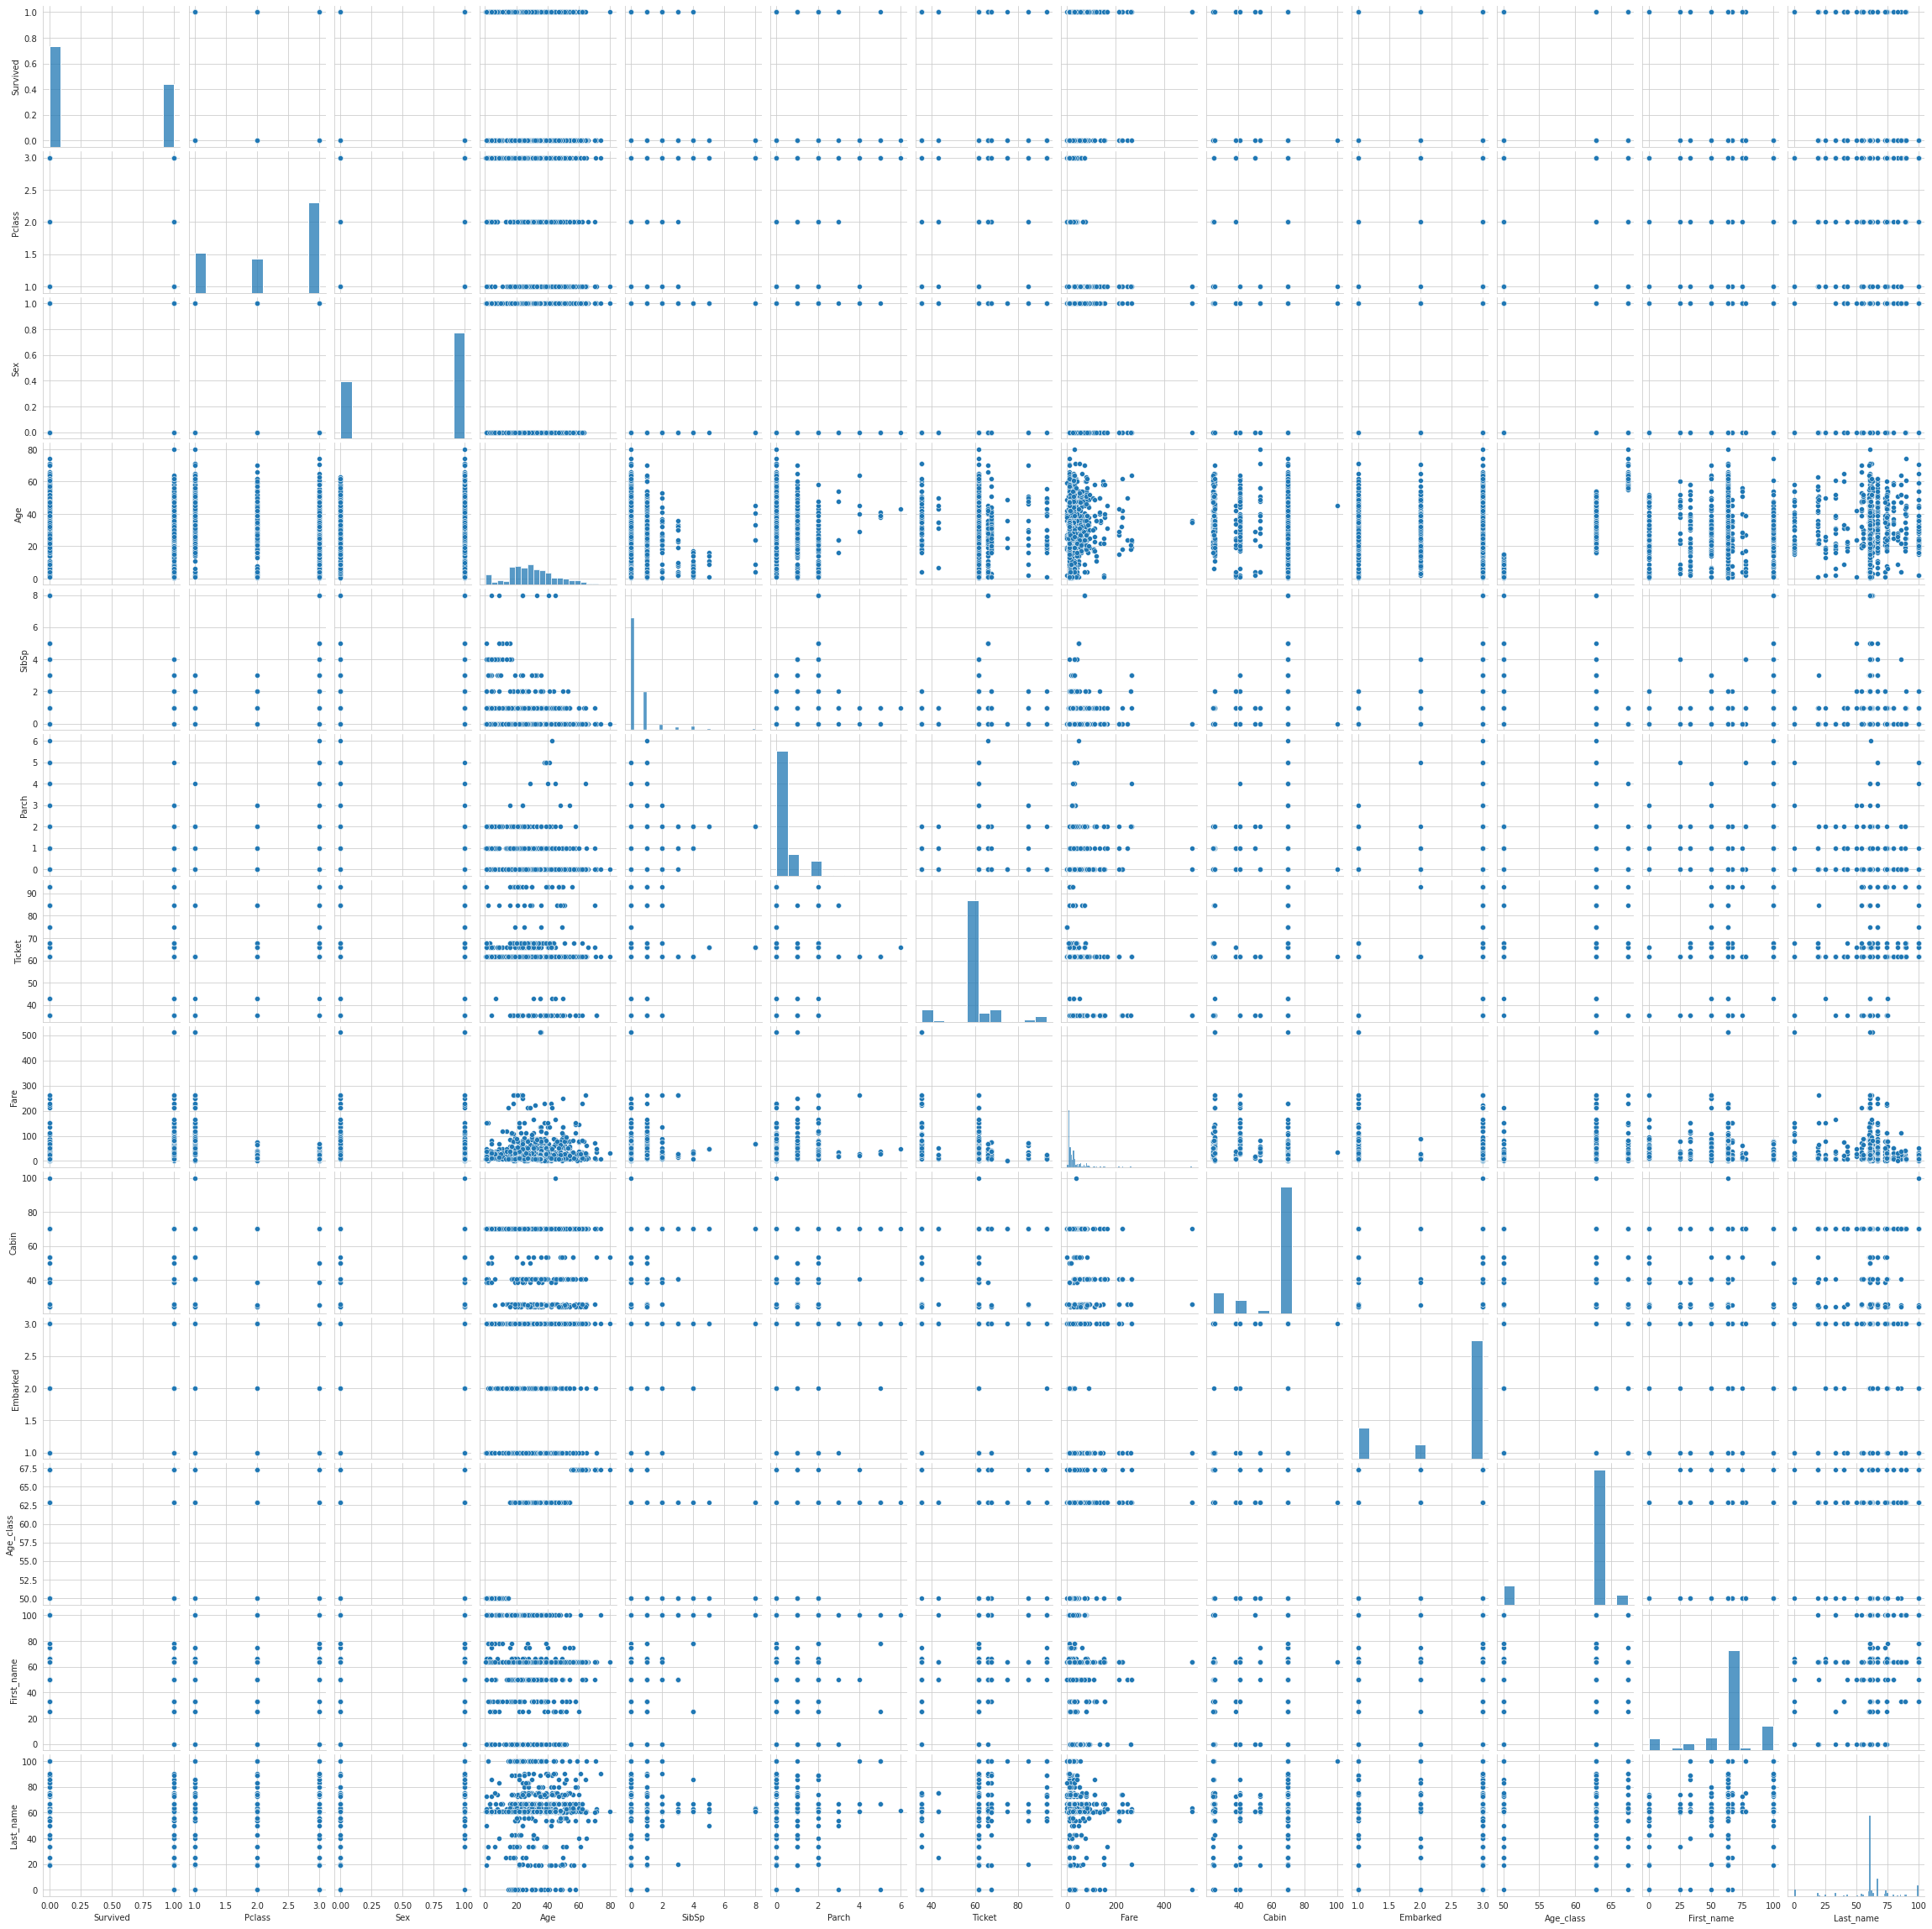

In [ ]:
sns.pairplot(df_encoding)

## **chi-square test**

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
s = SelectKBest(chi2, k=12)
s.fit(x,y)

SelectKBest(k=12, score_func=<function chi2 at 0x7f95403e2290>)

In [ ]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

,0,1
SibSp,2.581865,1.080942e-01
Age_class,5.186617,2.276148e-02
Embarked,6.180202,1.291875e-02
Parch,10.097499,1.484707e-03
Age,20.959099,4.691941e-06
Pclass,30.873699,2.753786e-08
Ticket,58.054628,2.549390e-14
Sex,92.702447,6.077838e-22
Cabin,423.623631,3.969430e-94
Last_name,790.128181,7.557685e-174


SibSp are not related to output. 

## **Separating dependent and independent variables**

In [42]:
x=df_encoding.drop('Survived',axis=1)
y=df_encoding['Survived']

In [43]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [44]:
num=['Age','Fare']

In [45]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [46]:
import scipy.stats as stat
import pylab 
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[num]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('Survived',axis=1)
  y_z=df_z.Survived
  return(x_z,y_z)

In [47]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 0.978776529338327


In [48]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

## **Logistic Regression**(0.862)

In [49]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(x_train_scaler, y_train)
y_pred=clf_lr.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[45  9]
 [ 6 30]]
0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        54
         1.0       0.77      0.83      0.80        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



In [62]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf_lr, ss.transform(x), y, cv=10)

lr_score=cv_results['test_score'].mean()



## **Random Forest Classifier**(0.868)

In [51]:
from sklearn.ensemble import RandomForestClassifier as RFC 
clf_rfc = RFC(random_state=42).fit(x_train, y_train)
y_pred=clf_rfc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[47  7]
 [ 6 30]]
0.8555555555555555
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        54
         1.0       0.81      0.83      0.82        36

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



In [52]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(), x, y, cv=10)

rfc_score=cv_results['test_score'].mean()


In [53]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(RFC(), x, y, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))


[[504  45]
 [ 66 276]]
0.8754208754208754
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       549
         1.0       0.86      0.81      0.83       342

    accuracy                           0.88       891
   macro avg       0.87      0.86      0.87       891
weighted avg       0.87      0.88      0.87       891



## **XGB Classifier**(0.878)

In [54]:
from xgboost import XGBClassifier as XBC
xgc=XBC().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[48  6]
 [ 6 30]]
0.8666666666666667
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        54
         1.0       0.83      0.83      0.83        36

    accuracy                           0.87        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



In [55]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(), x, y, cv=10)

xgc_score=cv_results['test_score'].mean()




## **Ada Boost Classifier**(0.858)

In [56]:
from sklearn.ensemble import AdaBoostClassifier as ABC 
abc=ABC().fit(x_train,y_train)

y_pred = abc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[46  8]
 [ 6 30]]
0.8444444444444444
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        54
         1.0       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



In [57]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ABC(), x, y, cv=10)

abc_score=cv_results['test_score'].mean()



## **Extra Tree Classifier**(0.865)

In [58]:
from sklearn.ensemble import ExtraTreesClassifier as ETC 

etc = ETC(random_state=123)
etc.fit(x_train, y_train)
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[45  9]
 [ 6 30]]
0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        54
         1.0       0.77      0.83      0.80        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



In [59]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETC(), x, y, cv=10)

etc_score=cv_results['test_score'].mean()


## **Support vector classifier**(0.882)

In [60]:
from sklearn.svm import SVC

svc = SVC(random_state=123)
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[49  5]
 [ 6 30]]
0.8777777777777778
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        54
         1.0       0.86      0.83      0.85        36

    accuracy                           0.88        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.88      0.88      0.88        90



In [61]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVC(), ss.transform(x), y, cv=10)

svc_score=cv_results['test_score'].mean()


## **Comparing models**

In [69]:
score=[lr_score,rfc_score,abc_score,etc_score,svc_score]
name=['LR','RFC','ABC','ETC','SVC']
pd.DataFrame([name,score]).T

,0,1
0,LR,0.866417
1,RFC,0.870936
2,ABC,0.85186
3,ETC,0.864182
4,SVC,0.877665


# **Hyper-parameter tuning** 

## **Random Forest**(0.876)

In [ ]:
from sklearn.model_selection import GridSearchCV


n_estimators = [int(x) for x in range(200,1000,200)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:

rf_random = GridSearchCV(RFC(), random_grid,  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 28.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('Best score:', rf_random.best_score_)
print('Best score:', rf_random.best_params_)
print('Best score:', rf_random.best_estimator_)


Best score: 0.8836231456921112
Best score: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [70]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), ss.transform(x), y, cv=10)

hp_RFC=cv_results['test_score'].mean()

In [71]:
rfc=RFC(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(x_train,y_train)
pred_prob2 = rfc.predict_proba(x_test)

## **XG Boost**(0.878)




In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xg_grid = GridSearchCV(XBC(n_jobs=-1), params, n_jobs=-1, cv=3)
xg_grid.fit(x_train, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.8762929815838477
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5}
Best score: XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [72]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), x_train, y_train, cv=10)

hp_XBC=cv_results['test_score'].mean()

In [73]:
xbc=XBC(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(x_train,y_train)

In [74]:
pred_prob3 = xbc.predict_proba(x_test)

## **Support vector classifier**(0.8821)

In [ ]:
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
 'C':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.05,0.1,0.5,1,2,5]}

svc_grid = GridSearchCV(SVC(), params, cv=10)
svc_grid.fit(ss.transform(x), y)

print('Best score:', svc_grid.best_score_)
print('Best score:', svc_grid.best_params_)
print('Best score:', svc_grid.best_estimator_)

Best score: 0.8821598002496879
Best score: {'C': 1, 'kernel': 'rbf'}
Best score: SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [75]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVC(), ss.transform(x), y, cv=10)

hp_SVC=cv_results['test_score'].mean()

In [76]:
from sklearn.calibration import CalibratedClassifierCV
svc = CalibratedClassifierCV(SVC())
svc.fit(x_train_scaler,y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale', kernel='rbf',
                                          max_iter=-1, probability=False,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=None, method='sigmoid')

In [78]:

pred_prob1 = svc.predict_proba(x_test_scaler)

# **Best Model Evaluation**

0.9017489711934157 0.9125514403292181 0.934156378600823


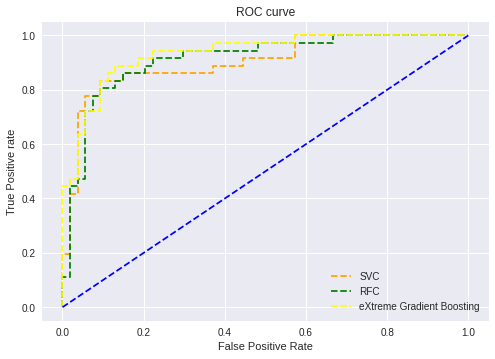

In [79]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])


print(auc_score1, auc_score2, auc_score3)


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVC')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RFC')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='eXtreme Gradient Boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**According to the according to AUC-ROC  curve, extreme gradient boosting is the best algorithm for the classification**

In [81]:
y_pred = xgc.predict(x)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))


[[527  22]
 [ 63 279]]
0.9046015712682379
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       549
         1.0       0.93      0.82      0.87       342

    accuracy                           0.90       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.91      0.90      0.90       891



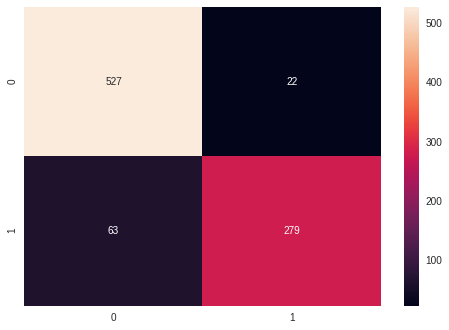

In [85]:
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='d')

# **Saving the model** 

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
import pickle

filename = '/content/drive/MyDrive/datatrained/titanic/model.sav'
pickle.dump(xgc, open(filename, 'wb'))

# **Conclusion**

In [91]:

filename = '/content/drive/MyDrive/datatrained/titanic/model.sav'
model = pickle.load(open(filename, 'rb'))

In [96]:
from sklearn.model_selection import cross_val_predict
y_pred = model.predict(x)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

[[527  22]
 [ 63 279]]
0.9046015712682379
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       549
         1.0       0.93      0.82      0.87       342

    accuracy                           0.90       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.91      0.90      0.90       891



In [97]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Survived,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
